In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("covid_19_clean_complete.csv")

df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


### Dataset Overview

- The dataset contains **49,068 records** and **10 features**.  
- Each row represents COVID-19 statistics for a specific **country/state on a specific date**.  



In [3]:
df["Date"] = pd.to_datetime(df["Date"])


In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


- The Date column was converted to datetime format to enable time-series analysis. The dataset spans from January 2020 to July 2020.

In [7]:
df.isna().sum()


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [8]:
df["Province/State"] = df["Province/State"].fillna("Unknown")


In [9]:
df.isna().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [10]:
df["Province/State"].value_counts().head()


Province/State
Unknown             34404
Yunnan                188
Mayotte               188
Guadeloupe            188
French Polynesia      188
Name: count, dtype: int64

 ### Missing Values 
 - Missing values were found only in the Province/State column, which is expected for countries without state-level reporting. These were filled with “Unknown” to retain all records.

In [12]:
df.isna().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  49068 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


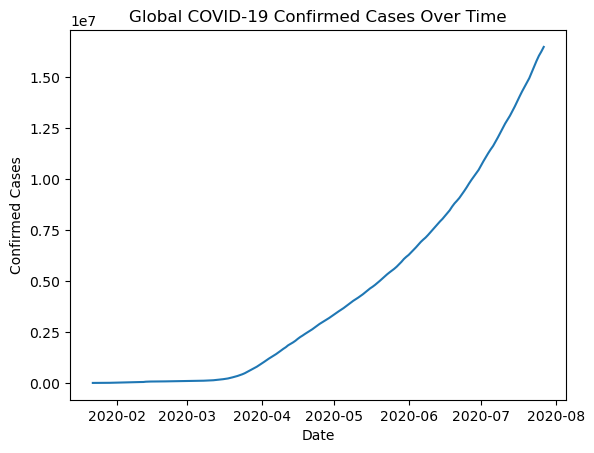

In [13]:

global_trend = df.groupby("Date")["Confirmed"].sum().reset_index()

plt.figure()
plt.plot(global_trend["Date"], global_trend["Confirmed"])
plt.title("Global COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()


### Global Trend Over Time 
- This plot aggregates confirmed cases across all countries for each date to show the global progression of COVID-19.
- The curve shows growth with sharp increases during major outbreak periods.

In [15]:
df["Date"].min(), df["Date"].max()


(Timestamp('2020-01-22 00:00:00'), Timestamp('2020-07-27 00:00:00'))

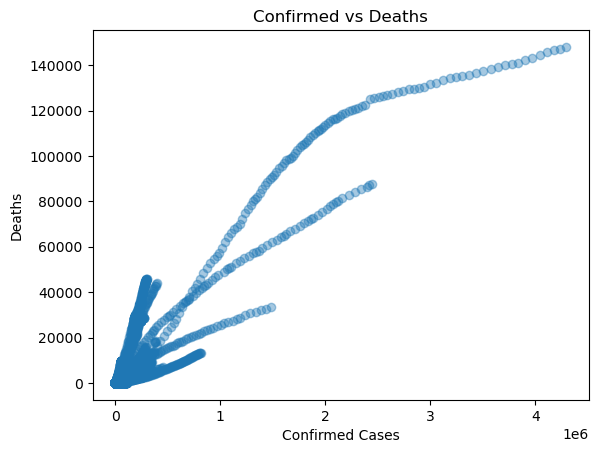

In [16]:
plt.figure()
plt.scatter(df["Confirmed"], df["Deaths"], alpha=0.4)
plt.title("Confirmed vs Deaths")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.show()


As confirmed cases increase, deaths also generally increase. The spread of points shows that different countries and time periods experienced different death rates, but the overall relationship is positive.

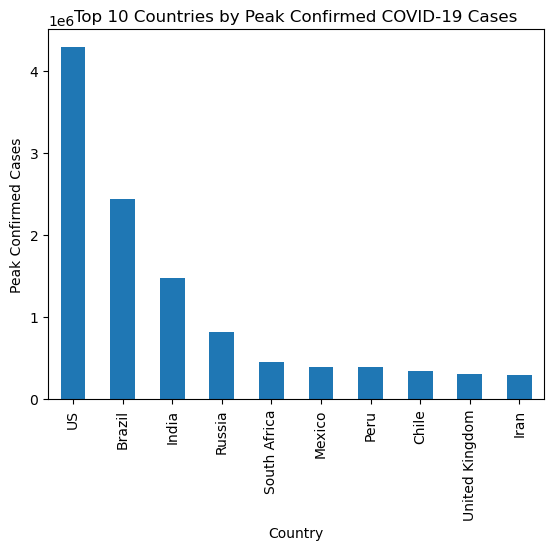

In [18]:
top10 = (
    df.groupby("Country/Region")["Confirmed"]
      .max()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top10.plot(kind="bar")
plt.title("Top 10 Countries by Peak Confirmed COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Peak Confirmed Cases")
plt.show()


### Top 10 Countries by Peak Cases
A small number of countries account for the highest peak case counts, contributing disproportionately to global totals.

In [25]:
global_daily["Date"] = pd.to_datetime(global_daily["Date"])


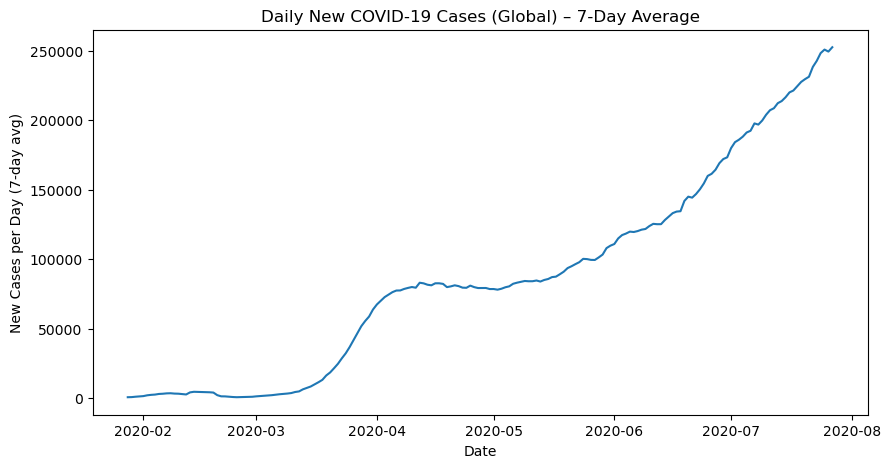

In [23]:
global_trend = df.groupby("Date")["Confirmed"].sum().reset_index()

global_daily = global_trend.copy()
global_daily["New_Cases"] = global_daily["Confirmed"].diff().fillna(0)
global_daily["New_Cases_7day_avg"] = global_daily["New_Cases"].rolling(7).mean()

plt.figure(figsize=(10, 5))
plt.plot(global_daily["Date"], global_daily["New_Cases_7day_avg"])
plt.title("Daily New COVID-19 Cases (Global) – 7-Day Average")
plt.xlabel("Date")
plt.ylabel("New Cases per Day (7-day avg)")
plt.show()


This chart displays the 7-day moving average of new COVID-19 cases reported globally each day.

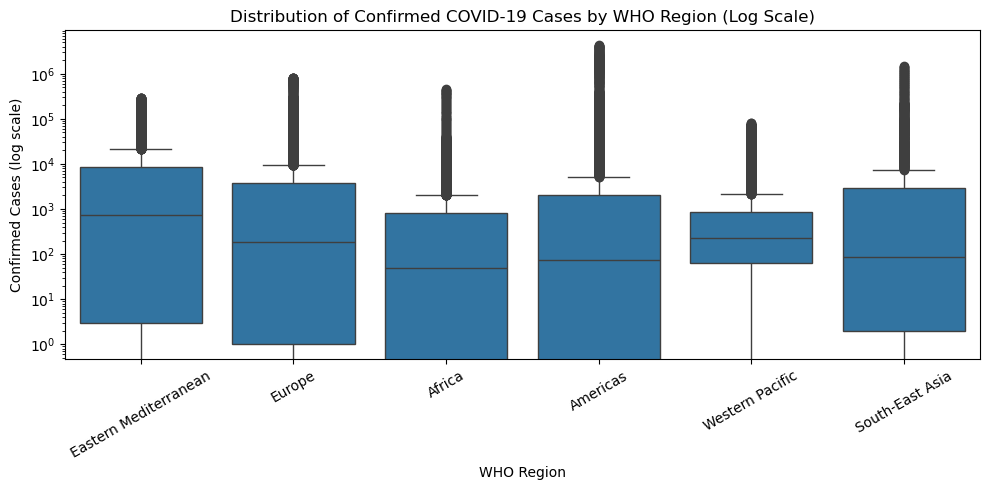

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="WHO Region", y="Confirmed")
plt.yscale("log")
plt.title("Distribution of Confirmed COVID-19 Cases by WHO Region (Log Scale)")
plt.xlabel("WHO Region")
plt.ylabel("Confirmed Cases (log scale)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
